In [2]:
#C:\Users\HP\OneDrive\Desktop\pyhton read file\Order_details(masked).csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Order_Details = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\pyhton read file\Order_details(masked).csv')

Order_Details.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


Create a new column called Time that has the DateTime format after converting the Transaction Date column into it. The DateTime format, which has the pattern YYYY-MM-DD HH:MM:SS, can be customized however you choose. Here we’re more interested in obtaining hours, so we can have an Hour column by using an in-built function for the same:

In [3]:
# here we have taken Transaction 
# date column 
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date']) 

# After that we extracted hour 
# from Transaction date column 
Order_Details['Hour'] = (Order_Details['Time']).dt.hour


We then require the “n” busiest hours. For that, we get the first “n” entries in a list containing the occurrence rates of the hours when the transaction took place. To further simplify the manipulation of the provided data in Python, we may utilize value counts for frequencies and tolist() to convert to list format. We are also compiling a list of the associated index values.

In [5]:
# n =24 in this case, can be modified 
# as per need to see top 'n' busiest hours 
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24] 

timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24] 


Finally, we stack the indices (hour) and frequencies together to yield the final result.

In [6]:
tmost = np.column_stack((timemost1,timemost2)) 

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n") 
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost)) 


 Hour Of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


Before we can create an appropriate data visualization, we must make the list slightly more customizable. To do so, we gather the hourly frequencies and perform the following tasks:

In [7]:
timemost = Order_Details['Hour'].value_counts() 
timemost1 = [] 

for i in range(0,23): 
	timemost1.append(i) 
	
timemost2 = timemost.sort_index() 
timemost2.tolist() 
timemost2 = pd.DataFrame(timemost2) 


For data visualization, we will proceed with Matplotlib for better comprehensibility, as it is one of the most convenient and commonly used libraries. But, It is up to you to choose any of the pre-existing libraries like Matplotlib, Ggplot, Seaborn, etc., to plot the data graphically.

The commands written below are mainly to ensure that X-axis takes up the values of hours and Y-axis takes up the importance of the number of transactions affected, and also various other aspects of a line chart, including color, font, etc., to name a few.

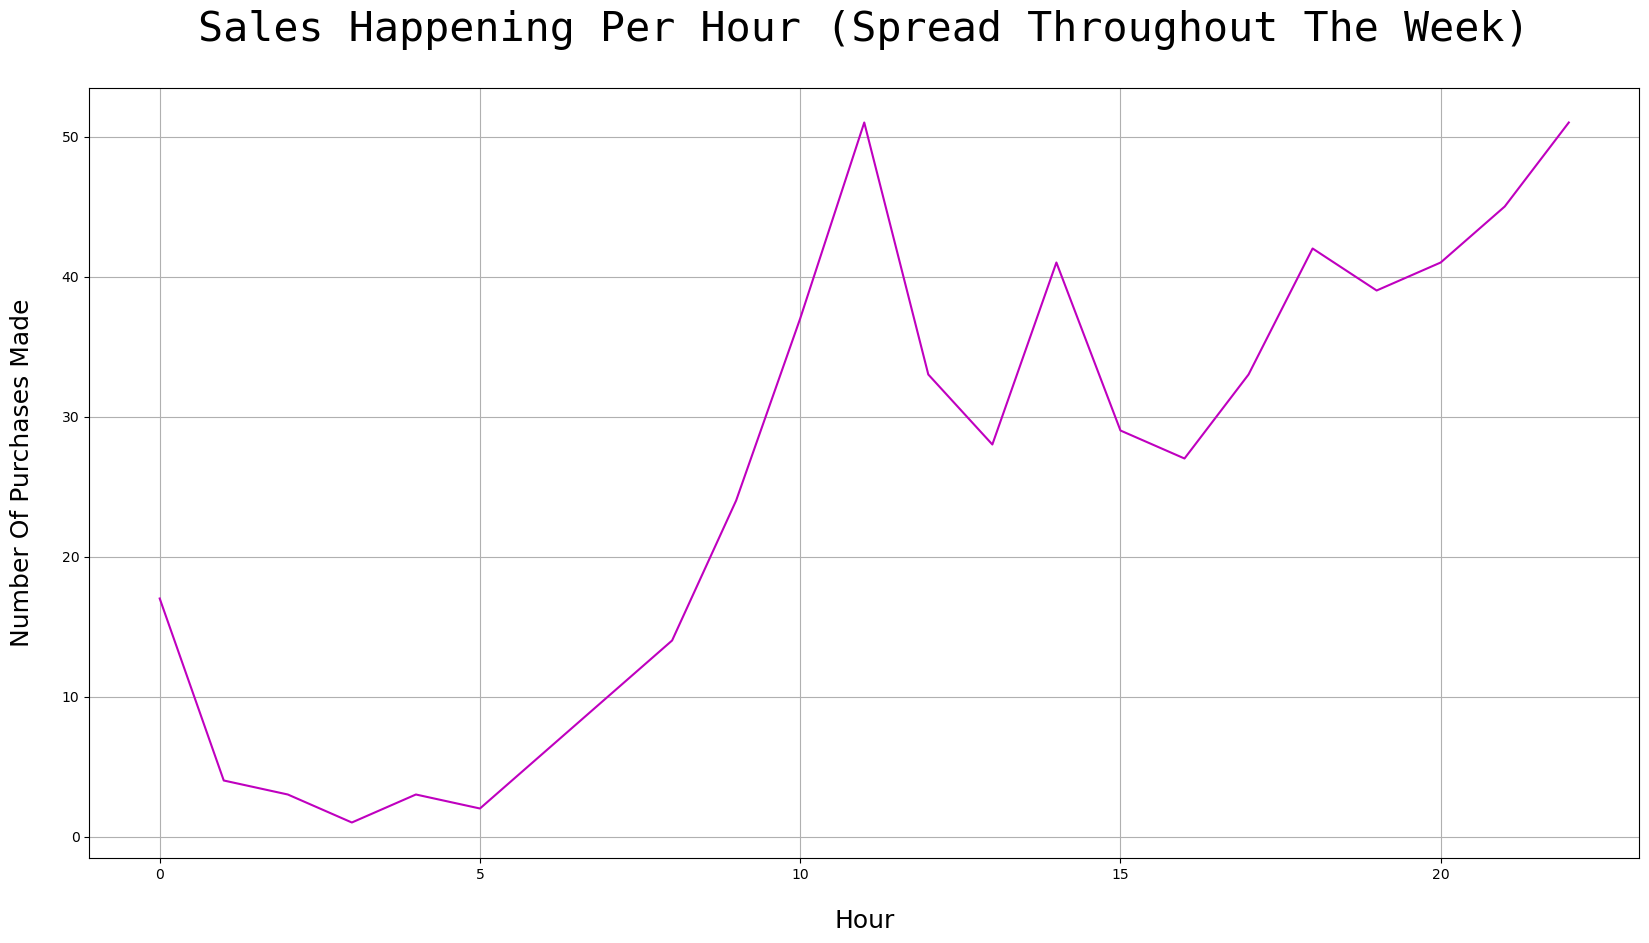

In [8]:
plt.figure(figsize=(20, 10)) 

plt.title('Sales Happening Per Hour (Spread Throughout The Week)', 
		fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05) 

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20) 
plt.xlabel("Hour", fontsize=18, labelpad=20) 
plt.plot(timemost1, timemost2, color='m') 
plt.grid() 
plt.show() 


The results are indicative of how sales typically peak in late evening hours prominently, and this data can be incorporated into business decisions to promote a product during that time specifically.